In [67]:
import pdb
import pandas as pd
import numpy as np
import os
import random
from scipy import stats
from scipy.stats import gaussian_kde
from datetime import datetime, timedelta
from faker import Faker
np.random.seed(3101)
random_state = np.random.RandomState(3101)
fake = Faker()
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

# Importing data:
bank1 = archive  
bank2 = bank+marketing

In [68]:
# print(os.getcwd())
bank_df_train = pd.read_csv('./data/main/train.csv')
bank_df_test = pd.read_csv('./data/main/test.csv')

In [69]:
print(bank_df_train.head())
print(len(bank_df_train))

# bank_df_train_clean = bank_df_train.drop_duplicates(subset="CustomerId", keep="first")
# print(len(bank_df_train_clean))

   id  CustomerId         Surname  CreditScore Geography Gender       Age  \
0   0    15674932  Okwudilichukwu          668    France   Male 33.000000   
1   1    15749177   Okwudiliolisa          627    France   Male 33.000000   
2   2    15694510           Hsueh          678    France   Male 40.000000   
3   3    15741417             Kao          581    France   Male 34.000000   
4   4    15766172       Chiemenam          716     Spain   Male 33.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3      0.000000              2   1.000000        0.000000   
1       1      0.000000              2   1.000000        1.000000   
2      10      0.000000              2   1.000000        0.000000   
3       2 148882.540000              1   1.000000        1.000000   
4       5      0.000000              2   1.000000        1.000000   

   EstimatedSalary  Exited  
0    181449.970000       0  
1     49503.500000       0  
2    184866.690000       0  
3     

In [70]:
print(bank_df_test.head())
len(bank_df_test)
# duplicates = bank_df_test.duplicated(subset=['CustomerId'], keep=False)
# print(duplicates)
#no "exited" column

       id  CustomerId    Surname  CreditScore Geography  Gender       Age  \
0  165034    15773898   Lucchese          586    France  Female 23.000000   
1  165035    15782418       Nott          683    France  Female 46.000000   
2  165036    15807120         K?          656    France  Female 34.000000   
3  165037    15808905  O'Donnell          681    France    Male 36.000000   
4  165038    15607314    Higgins          752   Germany    Male 38.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000000              2   0.000000        1.000000   
1       2      0.000000              1   1.000000        0.000000   
2       7      0.000000              2   1.000000        0.000000   
3       8      0.000000              1   1.000000        0.000000   
4      10 121263.620000              1   1.000000        0.000000   

   EstimatedSalary  
0    160976.750000  
1     72549.270000  
2    138882.090000  
3    113931.570000  
4    139431.00000

110023

Data Cleaning

Removed CustomerId column in both test & train since it is an unused var in the original dataset
All other columns returns no duplicates
scalling tenure too to when the bank opened

In [71]:
# bank_df_train = bank_df_train.loc[:, bank_df_train.columns!='CustomerId'] # extract all columns except for CustomerId
# print(bank_df_train[bank_df_train.duplicated() == True]) # check for duplicate columns 

# bank_df_test = bank_df_test.loc[:, bank_df_test.columns!='CustomerId']

### DELETE OR COMMENT OUT THIS LATER ###
# bank_df_train.drop_duplicates(subset=['CustomerId'], inplace=True)
# bank_df_test.drop_duplicates(subset=['CustomerId'], inplace=True)
### DELETE OR COMMENT OUT THIS LATER ###
bank_df_train['Age'] = bank_df_train['Age'].astype(int)
bank_df_test['Age'] = bank_df_test['Age'].astype(int)

n_train = len(bank_df_train)
n_test = len(bank_df_test)

aug_2022 = datetime(2022, 8, 31)
today = datetime.now()
months_since_aug_2022 = (today.year - aug_2022.year) * 12 + today.month - aug_2022.month - 1
def scale_int_to_months(int_val):
    return int_val * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'] * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'].astype(int)
print(bank_df_train['Tenure'].head(20))

0      5
1      1
2     19
3      3
4      9
5      7
6     15
7      1
8      7
9      7
10    11
11     5
12    17
13     9
14    13
15     9
16    13
17     7
18    15
19     1
Name: Tenure, dtype: int32


# Adding and populating features

### 13. Churn Date: The exact date the customer decided to exit.

In [72]:
start_date = datetime(2022, 8, 31)
end_date = end_date = datetime.now().strftime('%Y-%m-%d') 

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
def generate_random_date(exited, tenure_months):
    if exited == 1:
        tenure_days = tenure_months * 30
        random_date = np.random.choice(pd.date_range(start=start_date + timedelta(days=tenure_days), end=end_date, freq='D'))
        return random_date
    else:
        return np.nan
bank_df_train['ChurnDate'] = bank_df_train.apply(lambda row: generate_random_date(row['Exited'], row['Tenure']), axis=1)

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
# bank_df_train['ChurnDate'] = pd.to_datetime(bank_df_train['ChurnDate'])
print(bank_df_train[['Tenure', 'ChurnDate']].head(30))

    Tenure  ChurnDate
0        5        NaT
1        1        NaT
2       19        NaT
3        3        NaT
4        9        NaT
5        7 2023-10-15
6       15        NaT
7        1        NaT
8        7        NaT
9        7        NaT
10      11        NaT
11       5        NaT
12      17        NaT
13       9        NaT
14      13        NaT
15       9        NaT
16      13        NaT
17       7        NaT
18      15 2024-01-31
19       1 2023-03-08
20      17        NaT
21      15        NaT
22      17        NaT
23      17 2024-03-24
24      11        NaT
25      17 2024-03-03
26       5        NaT
27       3        NaT
28       7 2023-08-15
29      11        NaT


### 14. Sign Up Date: When did the customer create an account
has to be linked with churn date if any, and tenure. Tenure is usually rounded down, so (not needed anymore)


In [73]:
# def generate_signon_date(churn_date, tenure, exited):
#     if exited == 0:
#         churn_date = datetime.now().strftime('%Y-%m-%d')
#     churn_date = pd.to_datetime(churn_date)
#     max = churn_date - pd.DateOffset(years=tenure)
#     min = churn_date - pd.DateOffset(years=(tenure + 1))
#     random_dates = pd.date_range(min, max, freq='D').strftime('%Y-%m-%d')
#     random_date = np.random.choice(random_dates)
#     return random_date


# bank_df_train['SignDate'] = bank_df_train.apply(lambda row: generate_signon_date(row['ChurnDate'], row['Tenure'], row['Exited']), axis = 1)
# print(bank_df_train[['SignDate', 'ChurnDate', 'Tenure']].head(10))

# bank_df_test['SignDate'] = bank_df_train.apply(lambda row: generate_signon_date("2023-12-31", row['Tenure'], 0), axis = 1)
# # print(bank_df_train_clean.head(10))
# bank_df_train['SignDate'] = pd.to_datetime(bank_df_train['SignDate'])

### 15.Transaction History Freq
Detailed transaction data offers insights into spending patterns and engagement. (Transaction frequency in the last 28 days)

In [74]:
# transaction_df = pd.read_excel('./data/transaction_history.xlsx')

# # print(transaction_df.head())
# transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'])

# grouped_df = transaction_df.groupby('Account No')

# results = []
# for group_name, group_data in grouped_df:
#     # Get max and min dates for the group
#     max_date = group_data['DATE'].max()
#     min_date = max_date - pd.Timedelta(days=28)
    
#     # Filter group data for transactions within the date range
#     filtered_group = group_data[(group_data['DATE'] >= min_date) & (group_data['DATE'] <= max_date)]
    
#     # Calculate transaction frequency and amount for the group
#     transaction_frequency = len(filtered_group)
#     transaction_amount = filtered_group['DEPOSIT AMT'].sum()
    
#     # Append results to the list
#     results.append({
#         'Account No': group_name,
#         'Total Transaction Amount': transaction_amount,
#         'Transaction Frequency': transaction_frequency
#     })

# # Create DataFrame from results
# result_df = pd.DataFrame(results)

# result_df['Total Transaction Amount'] = result_df['Total Transaction Amount'].astype(int)
# pd.options.display.float_format = '{:,.0f}'.format
# # print(result_df['Total Transaction Amount'])

# # print("Minimum date in the dataset:", min_date)
# # print("Maximum date in the dataset:", max_date)

# kde_freq = gaussian_kde(result_df['Transaction Frequency'])
# kde_amnt = gaussian_kde(result_df['Total Transaction Amount'])
# # print(result_df['Total Transaction Amount'])

# fake_data_freq = kde_freq.resample(len(bank_df_train)).flatten()
# fake_data_freq = np.round(fake_data_freq).astype(int)
# bank_df_train['TransactionFreq'] = fake_data_freq
# fake_data_freq = kde_freq.resample(len(bank_df_test)).flatten()
# fake_data_freq = np.round(fake_data_freq).astype(int)
# bank_df_test['TransactionFreq'] = fake_data_freq

# # fake_data_amt = kde_amnt.resample(len(bank_df_train)).flatten()
# # # fake_data_amt = np.round(fake_data_amt).astype(int)
# # bank_df_train['TransactionAmnt'] = fake_data_amt
# # fake_data_amt = kde_amnt.resample(len(bank_df_test)).flatten()
# # # fake_data_amt = np.round(fake_data_amt).astype(int)
# # bank_df_test['TransactionAmnt'] = fake_data_amt

# # print(bank_df_train['TransactionAmnt'].head())
# date_28_days_ago = datetime.now() - timedelta(days=28)

# bank_df_train['TransactionFreq'] = np.where(
#     (bank_df_train['ChurnDate'] <= date_28_days_ago),
#     0,
#     bank_df_train['TransactionFreq']
# )

# bank_df_test['TransactionFreq'] = np.where(
#     (bank_df_test['IsActiveMember'] == 0),
#     0,
#     bank_df_test['TransactionFreq']
# )

# bank_df_train['TransactionFreq'] = np.maximum(bank_df_train['TransactionFreq'], 0)
# bank_df_test['TransactionFreq'] = np.maximum(bank_df_test['TransactionFreq'], 0)

# min_train_value = bank_df_train['TransactionFreq'].min()
# max_train_value = bank_df_train['TransactionFreq'].max()
# min_test_value = bank_df_test['TransactionFreq'].min()
# max_test_value = bank_df_test['TransactionFreq'].max()

# def scale_transaction_freq_train(freq):
#     scaled_freq = ((freq - min_train_value) / (max_train_value - min_train_value)) * 150
#     return scaled_freq

# def scale_transaction_freq_test(freq):
#     scaled_freq = ((freq - min_test_value) / (max_test_value - min_test_value)) * 150
#     return scaled_freq

# bank_df_train['TransactionFreq'] = bank_df_train['TransactionFreq'].apply(scale_transaction_freq_train).astype(int)

# bank_df_test['TransactionFreq'] = bank_df_test['TransactionFreq'].apply(scale_transaction_freq_test).astype(int)

# print(bank_df_train[['ChurnDate', 'TransactionFreq']].head(20))

In [75]:
from sklearn.neighbors import KernelDensity

trans_df = pd.read_csv('./data/Daily Household Transactions.csv')

trans_df['Date'] = pd.to_datetime(trans_df['Date'], errors='coerce')

# Filter out rows with invalid dates (NaT) if needed
trans_df = trans_df.dropna(subset=['Date'])

# Format 'Date' column as '%Y-%m-%d'
trans_df['Date'] = trans_df['Date'].dt.strftime('%Y-%m-%d')

# Extract year, month, and day into separate columns
trans_df['Year'] = trans_df['Date'].str[:4].astype(int)
trans_df['Month'] = trans_df['Date'].str[5:7].astype(int)
trans_df['Day'] = trans_df['Date'].str[8:10].astype(int)
print(trans_df['Date'].head(20))


monthly_data = trans_df.groupby(['Year', 'Month']).agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
monthly_data.rename(columns={'Amount': 'TotalAmount', 'Date': 'Frequency'}, inplace=True)
print(trans_df.head())


kde_freq = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde_amount = KernelDensity(bandwidth=1.0, kernel='gaussian')

# Fit KDE models to frequency and total amount data
kde_freq.fit(monthly_data['Frequency'].values.reshape(-1, 1))
kde_amount.fit(monthly_data['TotalAmount'].values.reshape(-1, 1))

# Generate new samples using KDE based on the number of rows in bank_df_train
new_freq_samples = kde_freq.sample(len(bank_df_train)).reshape(-1)
new_amount_samples = kde_amount.sample(len(bank_df_train)).reshape(-1)

new_freq_samples_2 = kde_freq.sample(len(bank_df_test)).reshape(-1)
new_amount_samples_2 = kde_amount.sample(len(bank_df_test)).reshape(-1)

# Add generated samples to the DataFrame bank_df_train
bank_df_train['TransactionFreq'] = new_freq_samples
bank_df_train['TransactionAmt'] = new_amount_samples

bank_df_test['TransactionFreq'] = new_freq_samples_2
bank_df_test['TransactionAmt'] = new_amount_samples_2

print(bank_df_train[['TransactionFreq', 'TransactionAmt']])

0     2018-09-20
1     2018-09-20
3     2018-09-17
4     2018-09-16
5     2018-09-15
6     2018-09-14
7     2018-09-13
8     2018-09-13
9     2018-09-13
30    2018-08-31
31    2018-08-31
32    2018-08-31
33    2018-08-31
34    2018-08-31
35    2018-08-30
36    2018-08-30
37    2018-08-29
38    2018-08-29
39    2018-08-29
40    2018-08-28
Name: Date, dtype: object
         Date                   Mode        Category              Subcategory  \
0  2018-09-20                   Cash  Transportation                    Train   
1  2018-09-20                   Cash            Food                   snacks   
3  2018-09-17  Saving Bank account 1    subscription  Mobile Service Provider   
4  2018-09-16                   Cash       Festivals             Ganesh Pujan   
5  2018-09-15            Credit Card    subscription                 Tata Sky   

                                       Note     Amount Income/Expense  \
0                      2 Place 5 to Place 0  30.000000        Expense   
1

C:\Users\2002s\AppData\Local\Temp\ipykernel_5916\3945804582.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  trans_df['Date'] = pd.to_datetime(trans_df['Date'], errors='coerce')


### 16. Transaction History Amt
Detailed transaction data offers insights into spending patterns and engagement. (Transaction amount in the last 28 days)


In [76]:
# # Import reference set
# # Warning: File size slightly big
# trans_hist_data = pd.read_excel('./data/transaction_history.xlsx')

# trans_hist_data.dtypes
# # trans_hist_data.describe()

# # Extract the most recent 2 sets of 3 months assuming the most recent data is the most accurate
# trans_1st_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2019-01')) & (trans_hist_data['DATE'] <= pd.to_datetime('2019-03'))]
# trans_2ns_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2018-10')) & (trans_hist_data['DATE'] <= pd.to_datetime('2018-12'))]

# trans_dist_data = trans_1st_3mths.groupby('Account No').agg({'VALUE DATE': 'size', 'WITHDRAWAL AMT':'sum', 'DEPOSIT AMT': 'sum'}).reset_index()
# trans_dist_data['TOTAL AMT'] = -trans_dist_data['WITHDRAWAL AMT'] + trans_dist_data['DEPOSIT AMT']

# # kde = gaussian_kde(trans_dist_data['VALUE DATE'])
# # train['Transaction Freq'] = abs(kde.resample(n_train).flatten()).astype(int)

# kde = gaussian_kde(trans_dist_data['TOTAL AMT'])
# bank_df_train['Cashflow'] = kde.resample(n_train).flatten().astype(float)
# bank_df_test['Cashflow'] = kde.resample(n_test).flatten().astype(float)

# date_28_days_ago = datetime.now() - timedelta(days=28)

# bank_df_train['Cashflow'] = np.where(
#     (bank_df_train['ChurnDate'] <= date_28_days_ago),
#     0,
#     bank_df_train['Cashflow']
# )

# bank_df_train['Cashflow'] = np.where(
#     (bank_df_train['TransactionFreq'] == 0),
#     0,
#     bank_df_train['Cashflow']
# )

# bank_df_test['Cashflow'] = np.where(
#     (bank_df_test['TransactionFreq'] == 0),
#     0,
#     bank_df_test['Cashflow']
# )

# new_min = -20000
# new_max = 20000

# current_min = bank_df_train['Cashflow'].min()
# current_max = bank_df_train['Cashflow'].max()

# # Perform Min-Max scaling
# bank_df_train['Cashflow'] = ((bank_df_train['Cashflow'] - current_min) / (current_max - current_min)) * (new_max - new_min) + new_min


# print(bank_df_train[['ChurnDate', 'TransactionFreq', 'Cashflow']].head(20))
# # print(bank_df_test[['TransactionFreq', 'TransactionAmt']].head(20))

In [77]:
#np.random.uniform(0, 1, size=bank_df_train.shape[0])

#bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] = bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] * unif[bank_df_train['TransactionAmt'] > bank_df_train['Balance']]
#bank_df_train['TransactionAmt'] > bank_df_train['Balance'] == True

# print(bank_df_train['TransactionAmt'].head(20))

### 17.Service Support Frequency (per mth)

In [78]:

support_freq = pd.read_csv("./data/support_frequency.csv")
kde = gaussian_kde(support_freq['no_of_cases'])
bank_df_train['ServiceSupportFrequency'] = abs(kde.resample(n_train).flatten()/12).astype(int)
bank_df_test['ServiceSupportFrequency'] = abs(kde.resample(n_test).flatten()/12).astype(int)

print(bank_df_train['ServiceSupportFrequency'])


0          0
1          1
2         27
3          5
4         17
          ..
165029     2
165030     5
165031    11
165032    10
165033    12
Name: ServiceSupportFrequency, Length: 165034, dtype: int32


### 18.Months Inactive
Indicates customer disengagement, potentially preceding churn. 

In [79]:
np.random.seed(3101)
bank_df_train['MonthsInactive'] = np.minimum(np.random.normal(0.5, 1.5, n_train), bank_df_train['Tenure'] * 12)
bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)

bank_df_test['MonthsInactive'] = bank_df_test.apply(lambda row: 
    np.random.normal(0.5, 1.5) if row['TransactionFreq'] == 0 else 0,
    axis=1)

def set_max_to_tenure(row):
    return min(row['MonthsInactive'], row['Tenure'])

bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)
bank_df_train['MonthsInactive'] = bank_df_train.apply(set_max_to_tenure, axis=1)
bank_df_train['MonthsInactive'] = bank_df_train['MonthsInactive'].astype(int)
bank_df_test['MonthsInactive'] = np.maximum(bank_df_test['MonthsInactive'], 0)
bank_df_test['MonthsInactive'] = bank_df_test.apply(set_max_to_tenure, axis=1)
bank_df_test['MonthsInactive'] = bank_df_test['MonthsInactive'].astype(int)

# print(bank_df_train['MonthsInactive'].head(20))
print(bank_df_test['MonthsInactive'].head(20))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: MonthsInactive, dtype: int32


### 19.Net Promoter Score (NPS)
Measure of customer satisfaction and loyalty.
Scaled from 1 to 10 


In [80]:
nps = pd.read_csv('./data/NPS.csv')

nps_data = nps.groupby('Customer Name').agg({'NPS':'mean'}).reset_index()
kde = gaussian_kde(nps_data['NPS'])
bank_df_train['NPS'] = abs(kde.resample(n_train).flatten()).astype(int)
bank_df_test['NPS'] = abs(kde.resample(n_test).flatten()).astype(int)
bank_df_train['NPS'] = np.ceil(bank_df_train['NPS']/12*10)
bank_df_test['NPS'] = np.ceil(bank_df_test['NPS']/12*10)
print(bank_df_train['NPS'].describe())

count   165034.000000
mean         5.730813
std          2.989480
min          0.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: NPS, dtype: float64


### 20.Education
Education level might influence financial behavior and churn.
Shld be correlated to 5. Acct Balance


In [81]:
education_marital = pd.read_csv("./data/education_marital.csv")

education = education_marital['Education_Level'].unique()

edu, counts = np.unique(education, return_counts=True)
value_to_index = {value: i for i, value in enumerate(edu)}
numerical_data = [value_to_index[value] for value in education]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [edu[index] for index in resampled_indices]
resampled_values_test = [edu[index] for index in resampled_indices_test]

bank_df_train['Education'] = resampled_values
bank_df_test['Education'] = resampled_values_test

def convert_phd_to_postdoc(edu_level):
    if edu_level == 'PHD':
        # Randomly choose between 'PHD' and 'Post-Doc' with equal probability
        return np.random.choice(['PHD', 'Post-Doc'])
    else:
        return edu_level  # Keep other education levels unchanged

bank_df_train['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_train['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_train['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_train['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_train['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_train['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_train['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_train['Education'] = bank_df_train['Education'].apply(convert_phd_to_postdoc)

bank_df_test['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_test['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_test['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_test['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_test['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_test['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_test['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_test['Education'] = bank_df_test['Education'].apply(convert_phd_to_postdoc)

print(bank_df_train['Education'].head(30))

0       Masters
1             A
2             A
3             A
4          PSLE
5      Post-Doc
6          PSLE
7     Bachelors
8     Bachelors
9     Bachelors
10          O/N
11         PSLE
12    Bachelors
13            A
14          PHD
15          O/N
16      Diploma
17          O/N
18    Bachelors
19    Bachelors
20     Post-Doc
21            A
22         PSLE
23          O/N
24     Post-Doc
25      Masters
26            A
27         PSLE
28    Bachelors
29         PSLE
Name: Education, dtype: object


### 21.Employment Status
Indicates financial stability, affecting churn likelihood. 
Shld be correlated to 5. Acct Balance & 21. Education  

In [82]:
employment = pd.read_csv("./data/employment.csv")

employment_data = employment['job'].unique()

employment_status, counts = np.unique(employment_data, return_counts=True)
value_to_index = {value: i for i, value in enumerate(employment_status)}
numerical_data = [value_to_index[value] for value in employment_data]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)
pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [employment_status[index] for index in resampled_indices]
resampled_values_test = [employment_status[index] for index in resampled_indices_test]

bank_df_train['EmploymentStatus'] = resampled_values
bank_df_test['EmploymentStatus'] = resampled_values_test

bank_df_train['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

bank_df_test['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

print(bank_df_train['EmploymentStatus'].head(20))

0          Parttime
1          Fulltime
2     Self-employed
3          Fulltime
4          Fulltime
5          Fulltime
6        Unemployed
7        Unemployed
8          Fulltime
9           Student
10         Fulltime
11          Retired
12          Student
13         Fulltime
14         Fulltime
15         Parttime
16         Fulltime
17         Parttime
18          Student
19         Fulltime
Name: EmploymentStatus, dtype: object


### 22.Marital Status
Can impact financial decision-making and churn behavior. 

In [83]:
education_marital = pd.read_csv("./data/education_marital.csv")

marital_status = education_marital['Marital_Status'].unique()

marital, counts = np.unique(marital_status, return_counts=True)
value_to_index = {value: i for i, value in enumerate(marital)}
numerical_data = [value_to_index[value] for value in marital_status]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [marital[index] for index in resampled_indices]
resampled_values_test = [marital[index] for index in resampled_indices_test]

bank_df_train['MaritalStatus'] = resampled_values
bank_df_test['MaritalStatus'] = resampled_values_test

bank_df_train['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)
bank_df_test['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)

print(bank_df_train['MaritalStatus'].head(20))

0       Single
1       Single
2       Single
3       Single
4     Divorced
5       Single
6      Married
7       Single
8     Divorced
9      Married
10    Divorced
11    Divorced
12     Married
13     Married
14      Single
15     Married
16     Married
17    Divorced
18     Married
19    Divorced
Name: MaritalStatus, dtype: object


### 23.Housing Status
Reflects stability and long-term commitment, influencing churn. 

In [84]:
housing = pd.read_csv("./data/housing.csv")

housing_status = housing['House_Ownership'].unique()

house, counts = np.unique(housing_status, return_counts=True)
value_to_index = {value: i for i, value in enumerate(house)}
numerical_data = [value_to_index[value] for value in housing_status]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [house[index] for index in resampled_indices]
resampled_values_test = [house[index] for index in resampled_indices_test]

bank_df_train['HousingStatus'] = resampled_values
bank_df_test['HousingStatus'] = resampled_values_test


print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  ChurnDate  TransactionFreq  \
0      0.000000              2  ...        NaT        31.872189   
1      0.000000              2  ...        NaT         9.298018   
2      0.000000              2  ...        NaT        20.511445   
3 148882.540000              1  ...        NaT        31.558041   
4      0.000000              2  ...        NaT        63.039220   

   TransactionAmt  ServiceSupportFrequency MonthsInactive      NPS  Education  \
0    67266.138297                  

### 24.Number of Dependents
Impacts financial priorities and risk tolerance, affecting churn.

In [85]:
dependants_df = pd.read_csv('./data/education+dependents+maritalstatus/BankChurners.csv')

kde = gaussian_kde(dependants_df['Dependent_count'])

bank_df_train['Dependants'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_train['Dependants'] = np.round(bank_df_train['Dependants']).astype(int)
bank_df_test['Dependants'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
bank_df_test['Dependants'] = np.round(bank_df_test['Dependants']).astype(int)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  TransactionFreq  TransactionAmt  \
0      0.000000              2  ...        31.872189    67266.138297   
1      0.000000              2  ...         9.298018    72333.156170   
2      0.000000              2  ...        20.511445    73542.938138   
3 148882.540000              1  ...        31.558041    73542.935693   
4      0.000000              2  ...        63.039220    58573.008083   

   ServiceSupportFrequency  MonthsInactive      NPS  Education  \
0                   

### 25.Marketing Offers Accepted
Indicates responsiveness to incentives, affecting churn. Range 0-1, (percentage of marketing offers they accept, e.g.5 offer, 4 accepted, the value of the column 0.8)

In [86]:
marketing_df = pd.read_csv('./data/marketing offers/marketing_campaign.csv', sep=';')


marketing_df["MarketingOffersAcceptance"] = (marketing_df['AcceptedCmp1'] + marketing_df['AcceptedCmp2'] + marketing_df['AcceptedCmp3'] + marketing_df['AcceptedCmp4'] + marketing_df['AcceptedCmp5']) / 5
# print(marketing_df.head())

kde = gaussian_kde(marketing_df['MarketingOffersAcceptance'])

bank_df_train['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_test['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  TransactionAmt  ServiceSupportFrequency  \
0      0.000000              2  ...    67266.138297                        0   
1      0.000000              2  ...    72333.156170                        1   
2      0.000000              2  ...    73542.938138                       27   
3 148882.540000              1  ...    73542.935693                        5   
4      0.000000              2  ...    58573.008083                       17   

   MonthsInactive      NPS Education  

### 26.Channel Used for Transactions
Reflects preferred banking channels and engagement level. 
faker

In [87]:
transaction_channel_df = pd.read_csv('./data/main_payment_method/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# print(transaction_channel_df.head())
methods = transaction_channel_df['PaymentMethod'].unique().tolist()
# print(methods)
faked_data = [random.choice(methods) for _ in range(len(bank_df_train))]
faked_data_2 = [random.choice(methods) for _ in range(len(bank_df_test))]

bank_df_train['PaymentMethod'] = faked_data
bank_df_test['PaymentMethod'] = faked_data_2

bank_df_train['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

bank_df_test['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

print(bank_df_train['PaymentMethod'].head(10))

0                                           PayNow
1                                       Debit card
2                                             FAST
3    Intrabank transfer (GXS Savings Account only)
4                                       Debit card
5    Intrabank transfer (GXS Savings Account only)
6                                       Debit card
7    Intrabank transfer (GXS Savings Account only)
8                                       Debit card
9                                       Debit card
Name: PaymentMethod, dtype: object


### 27.Customer Satisfaction Surveys
Provides direct feedback on satisfaction levels, predicting churn. 

In [88]:
cust_satisfaction_df = pd.read_csv('./data/satisfaction score/Customer-Churn-Records.csv')

kde = gaussian_kde(cust_satisfaction_df['Satisfaction Score'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 5)
fake_data = np.round(fake_data).astype(int)

fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 5)
fake_data_2 = np.round(fake_data_2).astype(int)

bank_df_train['CustomerSatisfaction'] = fake_data
bank_df_test['CustomerSatisfaction'] = fake_data_2
# print(len(bank_df_test))
# print(len(fake_data_2))

print(bank_df_train['CustomerSatisfaction'].head(10))

0    5
1    1
2    3
3    4
4    5
5    5
6    1
7    1
8    2
9    4
Name: CustomerSatisfaction, dtype: int32


### 28.Feature Satisfaction
Scale on 1 to 5


In [89]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['FeatureSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['FeatureSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['FeatureSatisfaction'].head())

0    1
1    4
2    4
3    2
4    4
Name: FeatureSatisfaction, dtype: int32


### 29.Support Satisfaction
Scale on 1 to 5


In [90]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['SupportSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['SupportSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['SupportSatisfaction'].head())

0    5
1    2
2    4
3    2
4    3
Name: SupportSatisfaction, dtype: int32


### 30. Feature support frequency

Higher calls might indicate issues and dissatisfaction, affecting churn. Past year. Past month 


In [91]:
support_freq = pd.read_csv("./data/support_frequency.csv")

kde = gaussian_kde(support_freq['no_of_cases'])
bank_df_train['FeatureSupportFrequency'] = abs(kde.resample(n_train).flatten()/12).astype(int)
bank_df_test['FeatureSupportFrequency'] = abs(kde.resample(n_test).flatten()/12).astype(int)
print(bank_df_train.head())


   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  EmploymentStatus  MaritalStatus  \
0      0.000000              2  ...          Parttime         Single   
1      0.000000              2  ...          Fulltime         Single   
2      0.000000              2  ...     Self-employed         Single   
3 148882.540000              1  ...          Fulltime         Single   
4      0.000000              2  ...          Fulltime       Divorced   

   HousingStatus  Dependants MarketingOffersAcceptance  \
0   norent_noown           3

### 31.Relationship Count
Reflects the breadth of the customer's relationship with the bank.
Shld be correlated to 6: No. of products   

In [92]:
relationship_count = pd.read_csv('./data/loan/credit_train.csv')
relationship_count['Current Loan Amount'].fillna(0, inplace=True) 

if np.any(np.isinf(relationship_count['Current Loan Amount'])):
    # Handle infinite values, such as replacing them with a large finite value
    relationship_count['Current Loan Amount'].replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


median_loan_amount = relationship_count['Current Loan Amount'].median()
below_median = relationship_count[relationship_count['Current Loan Amount'] < median_loan_amount]
above_median = relationship_count[relationship_count['Current Loan Amount'] >= median_loan_amount]

# print(above_median)
kde_upper = gaussian_kde(above_median['Current Loan Amount'])
kde_lower = gaussian_kde(below_median['Current Loan Amount'])

bank_df_train['RelationshipCount'] = np.where(bank_df_train['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_train).flatten()/12).astype(int) , abs(kde_lower.resample(n_train).flatten()/12).astype(int))
bank_df_test['RelationshipCount'] = np.where(bank_df_test['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_test).flatten()/12).astype(int) , abs(kde_lower.resample(n_test).flatten()/12).astype(int))

min_value = bank_df_train['RelationshipCount'].min()
max_value = bank_df_train['RelationshipCount'].max()
min_value_2 = bank_df_test['RelationshipCount'].min()
max_value_2 = bank_df_test['RelationshipCount'].max()
new_min_value = 3000
new_max_value = 30000

def scale_values(value):
    scaled_value = new_min_value + ((value - min_value) / (max_value - min_value)) * (new_max_value - new_min_value)
    return scaled_value

def scale_values_2(value):
    scaled_value = new_min_value + ((value - min_value_2) / (max_value_2 - min_value_2)) * (new_max_value - new_min_value)
    return scaled_value

bank_df_train['RelationshipCount'] = bank_df_train['RelationshipCount'].apply(scale_values)
bank_df_test['RelationshipCount'] = bank_df_test['RelationshipCount'].apply(scale_values_2)

# kde = gaussian_kde(relationship_count['Current Loan Amount'])
# bank_df_train['RelationshipCount'] = abs(kde.resample(n_train).flatten()/12).astype(int)

print(bank_df_train['RelationshipCount'].head(10))
print(bank_df_train['RelationshipCount'].max())
print(bank_df_train['RelationshipCount'].min())

0   26513.390401
1    3067.052704
2    3000.002730
3    4450.795805
4    4679.344987
5    3703.407793
6    3042.317755
7    3058.437375
8    3033.415794
9    3719.358163
Name: RelationshipCount, dtype: float64
30000.0
3000.0


### 32. Income Source
Indicates financial stability and potential churn risk. 

In [93]:
# income_source_df = pd.read_csv('./data/income source/adult.csv')

# # print(transaction_channel_df.head())
# income_sourcs = income_source_df['workclass'].unique().tolist()
# income_sourcs.remove('?')
# print(income_sourcs)
# faked_data = [random.choice(income_sourcs) for _ in range(len(bank_df_train))]
# faked_data_2 = [random.choice(income_sourcs) for _ in range(len(bank_df_test))]

# bank_df_train['IncomeSource'] = faked_data
# bank_df_test['IncomeSource'] = faked_data_2

def choose_value(row):
    if row['EmploymentStatus'] == 'Fulltime' or row['EmploymentStatus'] == 'Parttime':
        return np.random.choice(['Employment', 'Investment'])
    elif row['EmploymentStatus'] == 'Retired':
        return np.random.choice(['Retirement', 'Rental', 'Investment'])
    elif row['EmploymentStatus'] == 'Student':
        return np.random.choice(['Allowance', 'Employment'])
    elif row['EmploymentStatus'] == 'Self-employed':
        return 'Self-employment'
    elif row['EmploymentStatus'] == 'Unemployed':
        return np.random.choice(['Rental', 'Investment', 'Allowance'])
    
bank_df_train['IncomeSource'] = bank_df_train.apply(choose_value, axis=1)
print(bank_df_train[['EmploymentStatus', 'IncomeSource']].head(10))

  EmploymentStatus     IncomeSource
0         Parttime       Investment
1         Fulltime       Investment
2    Self-employed  Self-employment
3         Fulltime       Investment
4         Fulltime       Investment
5         Fulltime       Employment
6       Unemployed       Investment
7       Unemployed           Rental
8         Fulltime       Investment
9          Student       Employment


### 33. Credit Utilization
Reflects financial health and potential churn risk for credit customers.

In [94]:
credit_df = pd.read_csv('./data/credit utilization/BankChurners.csv')

kde = gaussian_kde(credit_df['Avg_Utilization_Ratio'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 1)
# fake_data = np.round(fake_data).astype(int)
fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 1)

bank_df_train['CreditUtilization'] = fake_data
bank_df_test['CreditUtilization'] = fake_data_2

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  Dependants  MarketingOffersAcceptance  \
0      0.000000              2  ...           3                   0.023096   
1      0.000000              2  ...           3                   0.235183   
2      0.000000              2  ...           1                   0.000000   
3 148882.540000              1  ...           2                   0.202409   
4      0.000000              2  ...           1                   0.002715   

                                   PaymentMethod  

### 34. Response to Previous Retention Efforts
Records success or failure of previous retention efforts, guiding future strategies. % 0-1

In [95]:
retention_df = pd.read_csv('./data/retention/HR_comma_sep.csv')

kde = gaussian_kde(retention_df['promotion_last_5years'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 1)

fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 1)


bank_df_train['Retention'] = fake_data
bank_df_test['Retention'] = fake_data_2

print(bank_df_train['Retention'].head(20))

0    0.043847
1    0.007964
2    0.000000
3    0.000000
4    0.036833
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
10   0.022747
11   0.000000
12   0.000000
13   0.012270
14   0.014287
15   0.000000
16   0.000000
17   0.038822
18   0.035702
19   0.005364
Name: Retention, dtype: float64


### 35. Change in behavior before n after
Average of percentage of increase/decrease (ranging from 0 - infinity, but most of the times it will be ard 0-2)

In [96]:
bank_df_train['ChangeInBehaviourMkt'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_test['ChangeInBehaviourMkt']= np.random.normal(1, 0.25, len(bank_df_test))
# test = np.random.normal(1, 0.25, len(bank_df_train))
# # print(test)
# bank_df_train['ChangeInBehaviourMkt'] = test.astype(float)

print(bank_df_train['ChangeInBehaviourMkt'].head(10))

0   1.328167
1   1.045383
2   1.060535
3   0.826953
4   1.156274
5   0.674956
6   0.872191
7   0.702804
8   1.079295
9   1.187106
Name: ChangeInBehaviourMkt, dtype: float64


### 36. Change in behavior before n after for Support

In [97]:
bank_df_train['ChanegInBehaviourCust'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_test['ChanegInBehaviourCust']= np.random.normal(1, 0.25, len(bank_df_test))

print(bank_df_train['ChanegInBehaviourCust'].head())

0   0.970182
1   0.637691
2   0.807880
3   0.628034
4   0.832254
Name: ChanegInBehaviourCust, dtype: float64


### 37. Previous Lifecycle status 

In [98]:
life_cycles = ['Active', 'Dormant', 'Reactivated'] #everything but churned

bank_df_train['PrevLifecycle'] = bank_df_train.apply(lambda row: np.random.choice(life_cycles) if row['Tenure'] > 1 else ('Churned' if row['Exited'] == 1 else np.nan), axis=1)
bank_df_test['PrevLifecycle'] = np.where(bank_df_test['Tenure'] > 1,
                                          np.random.choice(life_cycles, size=len(bank_df_test)),
                                          np.nan)

print(bank_df_train[['Tenure', 'PrevLifecycle']].head(50))
# print(bank_df_test[['Tenure', 'PrevLifecycle']].head(20))

    Tenure PrevLifecycle
0        5   Reactivated
1        1           NaN
2       19       Dormant
3        3        Active
4        9       Dormant
5        7        Active
6       15       Dormant
7        1           NaN
8        7   Reactivated
9        7       Dormant
10      11   Reactivated
11       5        Active
12      17       Dormant
13       9       Dormant
14      13       Dormant
15       9   Reactivated
16      13        Active
17       7       Dormant
18      15   Reactivated
19       1       Churned
20      17       Dormant
21      15   Reactivated
22      17       Dormant
23      17       Dormant
24      11   Reactivated
25      17       Dormant
26       5   Reactivated
27       3        Active
28       7       Dormant
29      11   Reactivated
30       9       Dormant
31      13   Reactivated
32       0       Churned
33      17       Dormant
34       9   Reactivated
35       5        Active
36       0           NaN
37      11       Dormant
38      17   Reactivated


### 38. Current Lifecycle status 

In [99]:
prev_active = ['Active', 'Dormant'] #excluding churn, also same for reactivated
prev_dormant = ['Dormant', 'Reactivated'] #excluding churn

# bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['PrevLifecycle'] == 'Churned' else \
#                                                     np.random.choice(prev_active) if (row['PrevLifecycle'] == 'Active' or row['PrevLifecycle'] == 'Reactivated') else \
#                                                     np.random.choice(prev_dormant) if row['PrevLifecycle'] == 'Dormant' else \
#                                                     np.nan, axis=1)
bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['PrevLifecycle'] == 'Churned' else \
                                                     'Reactivated' if (row['PrevLifecycle'] == 'Dormant' and row['TransactionFreq'] > 0) else \
                                                     'Dormant' if row['TransactionFreq'] == 0 else \
                                                     'Active', axis=1)

print(bank_df_train[['PrevLifecycle', 'CurrLifecycle']].head(10))


  PrevLifecycle CurrLifecycle
0   Reactivated        Active
1           NaN        Active
2       Dormant   Reactivated
3        Active        Active
4       Dormant   Reactivated
5        Active        Active
6       Dormant   Reactivated
7           NaN        Active
8   Reactivated        Active
9       Dormant   Reactivated


### 39. Customer Happiness Status 
1 == happy, 0 == unhappy

Customer satisfaction survey score 

Relationship Count 

Response to previous retention efforts (no more yay)

if we want the top 15.9%


In [100]:
happiness_benchmark = 84.1

# bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if row['CustomerSatisfaction'] + \
#                                                                   row['FeatureSatisfaction'] + \
#                                                                   row['SupportSatisfaction'] + \
#                                                                   row['NPS'] + \
#                                                                   row['Tenure'] >= happiness_benchmark else \
#                                                                   0, axis=1)


# need to delete Custpercentile, RsPercentile and ResponsePercentile later
bank_df_train['CustPercentile'] = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
bank_df_train['RsPercentile'] = bank_df_train['RelationshipCount'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))

bank_df_test['CustPercentile'] = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
bank_df_test['RsPercentile'] = bank_df_test['RelationshipCount'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))

# print(bank_df_train['CustPercentile'].head(10))
bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_train.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

bank_df_test['Happiness'] = bank_df_test.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_test.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

# print(bank_df_train['Happiness'].head(10))
# print("percentage happy =", (bank_df_train['Happiness'] == 1).mean() * 100)
print(bank_df_test['Happiness'].head(10))
print("percentage happy =", (bank_df_test['Happiness'] == 1).mean() * 100)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Happiness, dtype: int64
percentage happy = 20.187597138780074


### 40.Price Sensitivity %
26. marketing offers accepted %
35. change in behaviour %

Mkting Offers Accepted
Change in behavior before n after for mkting offer 


In [101]:
# MarketingOffersAcceptance_df = bank_df_train['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_train['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df = bank_df_train['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_train['ChangeInBehaviourMkt'], x))

# MarketingOffersAcceptance_df_2 = bank_df_test['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_test['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df_2 = bank_df_test['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_test['ChangeInBehaviourMkt'], x))
# # print(MarketingOffersAcceptance_df.head())
# # print(ChangeInBehaviourMkt_df.head())
# bank_df_train['PriceSensitivity'] = (MarketingOffersAcceptance_df + ChangeInBehaviourMkt_df) / 2
# bank_df_test['PriceSensitivity'] = (MarketingOffersAcceptance_df_2 + ChangeInBehaviourMkt_df_2) / 2

# print(bank_df_train['PriceSensitivity'].head(20))

In [102]:
bank_df_train['Savings Savant'] = ((bank_df_train['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_train['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2
bank_df_test['Savings Savant'] = ((bank_df_test['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_test['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2

### 41.Feature Driven % 
28. Customer satisfaction survey 0-5
6. num products 1-4
29. Feature Satisfaction 0-5

Number of products last 1 year
Feature Satisfaction Column (0 to 1)
Feature Support freq


In [103]:
# print(bank_df_train['NumOfProducts'].max())
# print(bank_df_train['NumOfProducts'].min())

# feature_driven = bank_df_train['CustomerSatisfaction'] + bank_df_train['NumOfProducts'] + bank_df_train['FeatureSatisfaction']
# percentiles = np.percentile(feature_driven, [0, 25, 50, 75, 100]) 

# def assign_percentile(metric):
#     if metric <= percentiles[1]:
#         return ((metric / percentiles[1]) * 25)
#     elif metric <= percentiles[2]:
#         return (25 + ((metric - percentiles[1]) / (percentiles[2] - percentiles[1])) * 25)
#     elif metric <= percentiles[3]:
#         return (50 + ((metric - percentiles[2]) / (percentiles[3] - percentiles[2])) * 25)
#     else:
#         return (75 + ((metric - percentiles[3]) / (percentiles[4] - percentiles[3])) * 25)
        
# bank_df_train['FeatureSensitivity'] = feature_driven.apply(assign_percentile)
# bank_df_train['FeatureSensitivity'] = bank_df_train['FeatureSensitivity'].replace(np.NaN, 0, regex=True)

# CustomerSatisfaction_df = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
# NumOfProducts_df = bank_df_train['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_train['NumOfProducts'], x))
# FeatureSatisfaction_df = bank_df_train['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df = bank_df_train['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))

# CustomerSatisfaction_df_2 = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
# NumOfProducts_df_2 = bank_df_test['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_test['NumOfProducts'], x))
# FeatureSatisfaction_df_2 = bank_df_test['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df_2 = bank_df_test['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))

# bank_df_train['FeatureSensitivity'] = (CustomerSatisfaction_df + NumOfProducts_df + FeatureSatisfaction_df + FeatureSupportFrequency_df) / 4
# bank_df_test['FeatureSensitivity'] = (CustomerSatisfaction_df_2 + NumOfProducts_df_2 + FeatureSatisfaction_df_2 + FeatureSupportFrequency_df_2) / 4

# print(bank_df_train['FeatureSensitivity'].head(20))

In [104]:
bank_df_train['Digital Dynamos'] = ((bank_df_train['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4
bank_df_test['Digital Dynamos'] = ((bank_df_test['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4


### 42.Service Dependent % 
31. service support freq per month number
39. Customer Happiness Status binary
36. Change in behavior before n after for Support %

CALL Support frequency
Support Satisfaction Column (0 to 1)
Change in behavior before n after support

In [105]:
# print(bank_df_train['ServiceSupportFrequency'])
# CallSupportFrequency_df = bank_df_train['CallSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['CallSupportFrequency'], x))
# ServiceSupportFrequency_df = bank_df_train['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['ServiceSupportFrequency'], x))
# SupportSatisfaction_df = bank_df_train['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df = bank_df_train['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_train['ChanegInBehaviourCust'], x))

# ServiceSupportFrequency_df_2 = bank_df_test['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['ServiceSupportFrequency'], x))
# SupportSatisfaction_df_2 = bank_df_test['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df_2 = bank_df_test['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_test['ChanegInBehaviourCust'], x))

# bank_df_train['ServiceSensitivity'] = (ServiceSupportFrequency_df + SupportSatisfaction_df + ChanegInBehaviourCust_df) / 3
# bank_df_test['ServiceSensitivity'] = (ServiceSupportFrequency_df_2 + SupportSatisfaction_df_2 + ChanegInBehaviourCust_df_2) / 3

# print(bank_df_train['ServiceSensitivity'].head())

In [106]:
bank_df_train['Trustee Tribe'] = ((bank_df_train['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_train['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['ChanegInBehaviourCust'].rank(pct=True)*100).astype(int))/3
bank_df_test['Trustee Tribe'] = ((bank_df_test['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_test['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['ChanegInBehaviourCust'].rank(pct=True)*100).astype(int))/3
print(bank_df_train['Trustee Tribe'].head())

0   46.666667
1   16.000000
2   59.666667
3   23.000000
4   49.000000
Name: Trustee Tribe, dtype: float64


### 43.Customer Personas 

In [107]:
print(bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']])

        Savings Savant  Digital Dynamos  Trustee Tribe
0            76.000000        60.750000      46.666667
1            74.500000        39.000000      16.000000
2            39.000000        64.250000      59.666667
3            55.500000        32.000000      23.000000
4            57.500000        71.250000      49.000000
...                ...              ...            ...
165029       55.000000        42.250000      65.666667
165030       44.500000        41.250000      54.000000
165031       89.500000        46.250000      50.333333
165032       39.500000        34.750000      59.666667
165033       53.500000        51.000000      53.333333

[165034 rows x 3 columns]


In [108]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Restore default warning behavior after your code
# warnings.simplefilter(action='default', category=FutureWarning)

persona_df = bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']]
largest_values = persona_df.max(axis=1)
smallest_values = persona_df.min(axis=1)

sum_values = persona_df.sum(axis=1)
second_largest_values = sum_values - largest_values - smallest_values
first_diff = largest_values - second_largest_values
second_diff = largest_values - smallest_values

def get_columns(row):
    sorted_indices = np.argsort(row)[::-1]  # Sort indices in descending order of values
    largest_index = sorted_indices[0]  # Index of the largest value
    second_largest_index = sorted_indices[1]  # Index of the second largest value
    smallest_index = sorted_indices[-1]  # Index of the smallest value
    return (persona_df.columns[largest_index], persona_df.columns[second_largest_index], persona_df.columns[smallest_index])

columns_tuple = persona_df.apply(get_columns, axis=1)
bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple.tolist(), index=persona_df.index)
bank_df_train.loc[first_diff > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_train.loc[second_diff > 10, ['ThirdPersona']] = np.nan

print(bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(10))

persona_df_2 = bank_df_test[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']]
largest_values_2 = persona_df_2.max(axis=1)
smallest_values_2 = persona_df_2.min(axis=1)

sum_values_2 = persona_df_2.sum(axis=1)
second_largest_values_2 = sum_values_2 - largest_values_2 - smallest_values_2
first_diff_2 = largest_values_2 - second_largest_values_2
second_diff_2 = largest_values_2 - smallest_values_2

columns_tuple_2 = persona_df_2.apply(get_columns, axis=1)
bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple.tolist(), index=persona_df.index)

bank_df_test.loc[first_diff_2 > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_test.loc[second_diff_2 > 10, ['ThirdPersona']] = np.nan

print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(20))
# print(persona_df_2.head(10))


      FirstPersona   SecondPersona ThirdPersona
0   Savings Savant             NaN          NaN
1   Savings Savant             NaN          NaN
2  Digital Dynamos   Trustee Tribe          NaN
3   Savings Savant             NaN          NaN
4  Digital Dynamos             NaN          NaN
5  Digital Dynamos             NaN          NaN
6   Savings Savant   Trustee Tribe          NaN
7    Trustee Tribe             NaN          NaN
8    Trustee Tribe  Savings Savant          NaN
9  Digital Dynamos   Trustee Tribe          NaN
       FirstPersona    SecondPersona   ThirdPersona
0    Savings Savant              NaN            NaN
1    Savings Savant  Digital Dynamos            NaN
2   Digital Dynamos    Trustee Tribe            NaN
3    Savings Savant              NaN            NaN
4   Digital Dynamos              NaN            NaN
5   Digital Dynamos    Trustee Tribe            NaN
6    Savings Savant              NaN            NaN
7     Trustee Tribe              NaN            NaN
8   

In [109]:
columns_to_normalize = ['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']

bank_df_train[columns_to_normalize] = bank_df_train[columns_to_normalize].div(bank_df_train[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_train['CustomerPersona'] = bank_df_train[columns_to_normalize].idxmax(axis=1)

bank_df_test[columns_to_normalize] = bank_df_test[columns_to_normalize].div(bank_df_test[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_test['CustomerPersona'] = bank_df_test[columns_to_normalize].idxmax(axis=1)

print(bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']])

        Savings Savant  Digital Dynamos  Trustee Tribe
0            41.435711        33.121308      25.442980
1            57.528958        30.115830      12.355212
2            23.938619        39.437340      36.624041
3            50.226244        28.959276      20.814480
4            32.348805        40.084388      27.566807
...                ...              ...            ...
165029       33.759591        25.933504      40.306905
165030       31.842576        29.516995      38.640429
165031       48.096731        24.854456      27.048813
165032       29.495955        25.948973      44.555072
165033       33.896515        32.312566      33.790919

[165034 rows x 3 columns]


### 44. Social Influencer

In [110]:
social_benchmark = 84.1

bank_df_train['SocialInfluencer'] = bank_df_train['NPS'].apply(lambda x: stats.percentileofscore(bank_df_train['NPS'], x))
bank_df_train['SocialInfluencer'] = bank_df_train.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

bank_df_test['SocialInfluencer'] = bank_df_test['NPS'].apply(lambda x: stats.percentileofscore(bank_df_test['NPS'], x))
bank_df_test['SocialInfluencer'] = bank_df_test.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

print(bank_df_train['SocialInfluencer'].head(10))
print("percentage social influencer =", (bank_df_train['SocialInfluencer'] == 1).mean() * 100)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: SocialInfluencer, dtype: int64
percentage social influencer = 16.483270114037108


### 45. Combined Personas column

In [111]:
# bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
# bank_df_test['CombinedPersonas'] = bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
def combine_personas(row):
    if ('Savings Savant' in row.values) and ('Digital Dynamos' in row.values) and ('Trustee Tribe' in row.values):
        return 'Triple Advantage Allies'
    elif ('Savings Savant' in row.values) and ('Digital Dynamos' in row.values):
        return 'Frugal Innovators'
    elif ('Savings Savant' in row.values) and ('Trustee Tribe' in row.values):
        return 'Cost-Conscious Careseekers'
    elif ('Digital Dynamos' in row.values) and ('Trustee Tribe' in row.values):
        return 'Premium Patrons'
    elif 'Savings Savant' in row.values:
        return 'Savings Savant'
    elif 'Digital Dynamos' in row.values:
        return 'Digital Dynamos'
    elif 'Trustee Tribe' in row.values:
        return 'Trustee Tribe'
bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(combine_personas, axis=1)
print(bank_df_train['CombinedPersonas'].head(10))

0                Savings Savant
1                Savings Savant
2               Premium Patrons
3                Savings Savant
4               Digital Dynamos
5               Digital Dynamos
6    Cost-Conscious Careseekers
7                 Trustee Tribe
8    Cost-Conscious Careseekers
9               Premium Patrons
Name: CombinedPersonas, dtype: object


# Removing useless columns

In [112]:
# print(bank_df_train.dtypes)
useless_cols = ['id', 'CustomerId', 'Surname', 'Geography', 'Exited', 'IsActiveMember', 'CreditScore', 'HasCrCard']
useless_cols_2 = ['id', 'CustomerId', 'Surname', 'Geography', 'IsActiveMember', 'CreditScore', 'HasCrCard']
# to_one_hot_encode_cols = ['Gender', 'Education', 'Employment Status', 'Marital Status', 'Housing Status', 'PaymentMethod', 'IncomeSource', 'PrevLifecycle', 'CurrLifecycle', 'CustomerPersona']

bank_df_train.drop(columns=useless_cols, inplace=True)
bank_df_test.drop(columns=useless_cols_2, inplace=True)
# bank_df_train = pd.get_dummies(bank_df_train, columns=to_one_hot_encode_cols)



In [113]:
# reference_date = bank_df_train['ChurnDate'].min()
# bank_df_train['ChurnDate_Numeric'] = (bank_df_train['ChurnDate'] - reference_date).dt.days
# bank_df_train['ChurnDate_Numeric'] = pd.to_numeric(bank_df_train['ChurnDate'])


print(bank_df_train.dtypes)
print(bank_df_train.head(10))
print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona', 'Happiness', 'SocialInfluencer']].head(10))

# to get our dates back
# bank_df_train['ChurnDate_Back'] = reference_date + pd.to_timedelta(bank_df_train['ChurnDate_Numeric'], unit='D')

Gender                               object
Age                                   int32
Tenure                                int32
Balance                             float64
NumOfProducts                         int64
EstimatedSalary                     float64
ChurnDate                    datetime64[ns]
TransactionFreq                     float64
TransactionAmt                      float64
ServiceSupportFrequency               int32
MonthsInactive                        int32
NPS                                 float64
Education                            object
EmploymentStatus                     object
MaritalStatus                        object
HousingStatus                        object
Dependants                            int32
MarketingOffersAcceptance           float64
PaymentMethod                        object
CustomerSatisfaction                  int32
FeatureSatisfaction                   int32
SupportSatisfaction                   int32
FeatureSupportFrequency         

In [114]:
print(bank_df_test.dtypes)
print(bank_df_test.head(10))

Gender                        object
Age                            int32
Tenure                         int64
Balance                      float64
NumOfProducts                  int64
EstimatedSalary              float64
TransactionFreq              float64
TransactionAmt               float64
ServiceSupportFrequency        int32
MonthsInactive                 int32
NPS                          float64
Education                     object
EmploymentStatus              object
MaritalStatus                 object
HousingStatus                 object
Dependants                     int32
MarketingOffersAcceptance    float64
PaymentMethod                 object
CustomerSatisfaction           int32
FeatureSatisfaction            int32
SupportSatisfaction            int32
FeatureSupportFrequency        int32
RelationshipCount            float64
CreditUtilization            float64
Retention                    float64
ChangeInBehaviourMkt         float64
ChanegInBehaviourCust        float64
P

### One hot encoding Current Lifecycle 

In [163]:
one_hot_encode = pd.get_dummies(bank_df_train, columns=['PrevLifecycle'],dtype ='int').iloc[:,-4:]
bank_df_train = pd.concat([bank_df_train, one_hot_encode], axis = 1)

# one_hot_encode2 = pd.get_dummies(bank_df_test, columns=['PrevLifecycle'],dtype ='int').iloc[:,-4:]
# bank_df_test = pd.concat([bank_df_test, one_hot_encode2], axis = 1)

### FOR THE TIME BEING, PUT SOME CURR LIFECYCLE = DORMANT 

In [159]:
n = round(bank_df_train.shape[0]*0.25)
bank_df_train['CurrLifecycle'].iloc[:n] = "Dormant"

print(bank_df_train['CurrLifecycle'].head)

<bound method NDFrame.head of 0             Dormant
1             Dormant
2             Dormant
3             Dormant
4             Dormant
             ...     
165029         Active
165030    Reactivated
165031    Reactivated
165032    Reactivated
165033        Churned
Name: CurrLifecycle, Length: 165034, dtype: object>


C:\Users\2002s\AppData\Local\Temp\ipykernel_5916\4102598907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_train['CurrLifecycle'].iloc[:n] = "Dormant"


# EDA


### 1. Correlation matrix

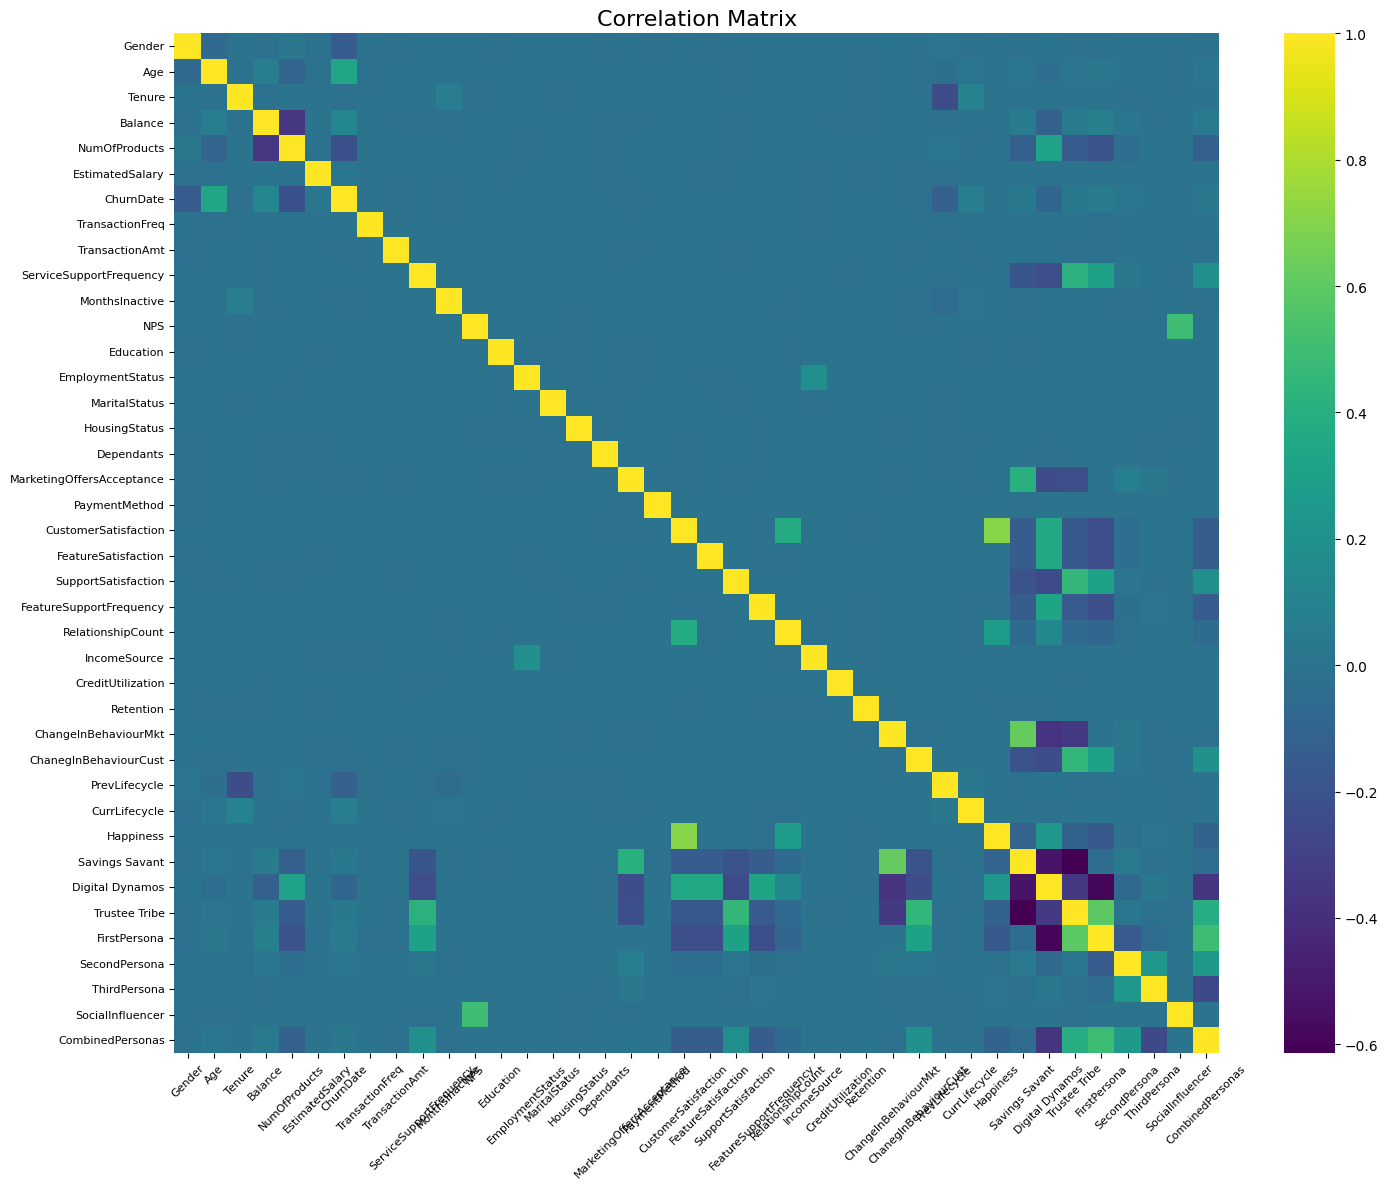

CustomerSatisfaction and Happiness: 0.706940424760678
ChangeInBehaviourMkt and Savings Savant: 0.6182056781719012
Happiness and CustomerSatisfaction: 0.706940424760678
Savings Savant and ChangeInBehaviourMkt: 0.6182056781719012
Savings Savant and Digital Dynamos: -0.5277504076364034
Savings Savant and Trustee Tribe: -0.6134656686130222
Digital Dynamos and Savings Savant: -0.5277504076364034
Digital Dynamos and FirstPersona: -0.5907060037928012
Trustee Tribe and Savings Savant: -0.6134656686130222
Trustee Tribe and FirstPersona: 0.5952082107694666
FirstPersona and Digital Dynamos: -0.5907060037928012
FirstPersona and Trustee Tribe: 0.5952082107694666


In [115]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bank_df_train is your DataFrame with both numeric and categorical columns

# Create a copy of the DataFrame
encoded_df = bank_df_train.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns using LabelEncoder
for col in encoded_df.select_dtypes(include=['object']):
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Calculate correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap for all columns without numeric annotations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

# Identify highly correlated columns
correlated_columns = []
threshold = 0.51   # Adjust as needed

for col in corr_matrix.columns:
    correlated_cols = corr_matrix.index[(corr_matrix[col] > threshold) | (corr_matrix[col] < -threshold)].tolist()
    correlated_cols.remove(col)  # Remove the current column itself
    correlated_columns.extend([(col, corr) for corr in correlated_cols])

# Print highly correlated columns and their correlations
for col, corr in correlated_columns:
    print(f"{col} and {corr}: {corr_matrix.loc[col, corr]}")

In [116]:
# Identify highly correlated columns with 'Account balance'
target_column = 'Balance'
correlated_with_target = corr_matrix[target_column].drop(target_column).sort_values(ascending=False)

# Print the most highly correlated column and its correlation value
most_correlated_column = correlated_with_target.index[0]
correlation_value = correlated_with_target.iloc[0]
print(f"The column most highly correlated with '{target_column}' is '{most_correlated_column}' with a correlation of {correlation_value:.2f}")


The column most highly correlated with 'Balance' is 'ChurnDate' with a correlation of 0.13


In [117]:
# Assuming 'column1' and 'column2' are the names of the two specific columns you want to find the correlation for
column1 = 'Balance'
column2 = 'Age'

# Find the correlation value between 'column1' and 'column2'
correlation_value = corr_matrix.loc[column1, column2]

# Print the correlation value
print(f"The correlation value between '{column1}' and '{column2}' is {correlation_value:.2f}")


The correlation value between 'Balance' and 'Age' is 0.06


### 2. LDA

In [118]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# # Assuming bank_df_train is already defined and contains your data

# # Create a copy of bank_df_train
# test_df = bank_df_train.copy()

# # Separate features and target
# y = test_df['Exited']
# X = test_df.drop(columns=['Exited'])  # Drop 'Exited' column and create X

# # Convert X and y to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Reshape y to a 1D array if needed
# if y.ndim > 1:
#     y = y.ravel()

# # Initialize LDA model
# lda = LinearDiscriminantAnalysis(n_components=1)  # Set the number of components (dimensions)

# # Fit the model to the data
# lda.fit(X, y)

# # Transform the data
# X_lda = lda.transform(X)

# # Add the transformed data to the DataFrame
# test_df['LDA_Component'] = X_lda

# # Print the DataFrame with LDA component
# print(test_df)


### 3. Try MCA 

In [119]:
#col_idx = [(i, column_name) for i, column_name in enumerate(bank_df_train.columns)]

In [120]:
#X_train_1 = bank_df_train.iloc[:, [1] + list(range(14, 17)) + [20, 26]]
#X_train_2 = bank_df_train.iloc[:, 21:38]

In [121]:
# mca = prince.MCA(n_components=2)
# mca = mca.fit(X_train_1)

In [122]:
# mca.column_contributions_.head().style.format('{:.0%}')

### 4. FAMD

In [123]:
# famd = prince.FAMD(n_components=2)
# famd = famd.fit(X_train_2)

# Export to csv

In [165]:
from sklearn.model_selection import train_test_split
# bank_df_train.to_csv('./data/final/dataset.csv', index=False)
# bank_df_test.to_csv('./data/final/test_data.csv', index=False)

# Assuming your DataFrame is named df and contains your data
# Splitting into train and test sets with a ratio of 2:8
train_df, test_df = train_test_split(bank_df_train, test_size=0.8, random_state=42, stratify=bank_df_train['CurrLifecycle'])

# Print the sizes of the train and test sets
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

train_df.to_csv('./data/final/train.csv', index=False)
test_df.to_csv('./data/final/test.csv', index=False)

Train set size: 33006
Test set size: 132028


PermissionError: [Errno 13] Permission denied: './data/final/train.csv'

# Model Training

In [125]:
bank_df_train 
bank_df_test #missing ChurnDate and CurrLifecycle

,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,TransactionFreq,TransactionAmt,ServiceSupportFrequency,MonthsInactive,...,ChanegInBehaviourCust,PrevLifecycle,Happiness,Savings Savant,Digital Dynamos,Trustee Tribe,FirstPersona,SecondPersona,ThirdPersona,SocialInfluencer
0,Female,23,2,0.000000,2,160976.750000,8.332545,60656.050892,2,0,...,1.084213,Reactivated,0,45.565749,23.853211,30.581040,Savings Savant,NaN,NaN,0
1,Female,46,2,0.000000,1,72549.270000,12.158515,505829.821342,4,0,...,1.421238,Active,0,27.088036,32.279910,40.632054,Savings Savant,Digital Dynamos,NaN,0
2,Female,34,7,0.000000,2,138882.090000,11.667146,58871.041830,18,0,...,1.100502,Reactivated,1,31.732326,38.046411,30.221263,Digital Dynamos,Trustee Tribe,NaN,0
3,Male,36,8,0.000000,1,113931.570000,5.398699,206298.599238,4,0,...,1.504583,Dormant,0,9.939759,25.301205,64.759036,Savings Savant,NaN,NaN,0
4,Male,38,10,121263.620000,1,139431.000000,48.579613,15989.280587,28,0,...,0.787850,Active,0,40.469208,27.624633,31.906158,Digital Dynamos,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Male,29,7,116099.820000,1,148087.620000,10.644783,68935.647511,0,0,...,0.718164,Dormant,0,32.917706,40.399002,26.683292,Trustee Tribe,NaN,NaN,0
110019,Female,36,4,178032.530000,1,42181.680000,58.703904,75176.796908,32,0,...,0.803505,Reactivated,0,35.016393,35.606557,29.377049,Trustee Tribe,Savings Savant,Digital Dynamos,0
110020,Male,31,2,0.000000,2,16287.380000,4.271885,63138.214910,1,0,...,1.057370,Reactivated,1,33.316953,35.233415,31.449631,Digital Dynamos,Trustee Tribe,Savings Savant,0
110021,Female,32,3,0.000000,1,158816.580000,21.002973,505829.703195,14,0,...,1.020228,Dormant,1,31.050228,30.593607,38.356164,Savings Savant,NaN,NaN,0
